In [2]:
import tensorflow
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

Text(0.5, 1.0, '0')

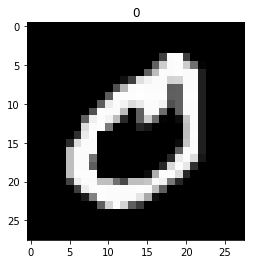

In [3]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()
plt.imshow(X_treinamento[21], cmap = 'gray')
plt.title(y_treinamento[21])

In [4]:
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))

In [5]:
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [6]:
X_treinamento /= 255
X_teste /= 255

In [7]:
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)

In [8]:
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 10, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
modelo.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total para

In [11]:
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(X_treinamento, y_treinamento, epochs = 20,
                       validation_data = (X_teste, y_teste))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.4435 - acc: 0.8647 - val_loss: 0.1674 - val_acc: 0.9489
Epoch 2/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.2274 - acc: 0.9356 - val_loss: 0.1434 - val_acc: 0.9588
Epoch 3/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.1911 - acc: 0.9446 - val_loss: 0.1197 - val_acc: 0.9645
Epoch 4/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.1673 - acc: 0.9512 - val_loss: 0.1085 - val_acc: 0.9666
Epoch 5/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.1508 - acc: 0.9552 - val_loss: 0.1044 - val_acc: 0.9690
Epoch 6/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.1425 - acc: 0.9574 - val_loss: 0.1048 - val_acc: 0.9700
Epoch 7/20
60000/60000 [==============================] - 7s 115us/step - 

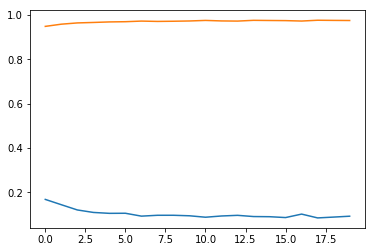

In [12]:
historico.history.keys()
plt.plot(historico.history['val_loss'])
plt.plot(historico.history['val_acc'])

In [13]:
previsoes = modelo.predict(X_teste)
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)

In [14]:
y_treinamento[20]
novo = X_treinamento[20]
novo = np.expand_dims(novo, axis = 0)
pred = modelo.predict(novo)